In [1]:
!pip install -U sentence-transformers


In [19]:
from sentence_transformers import SentenceTransformer, util
import numpy as np


class DistMatrix:
    model_zoo = {'bert': 'sentence-transformers/bert-base-nli-mean-tokens', 'clip': 'clip-ViT-L-14'}
    
    def __init__(self, class_dict, mode='bert'):
        self.categories = [{
        'class_name': k,
        'class_label': v,} 
        for k, v in class_dict.items()]

        self.mode = mode
        self.model = SentenceTransformer(model_zoo[mode])

        self.dist_matrix = self.create_matrix()

    def get_cos_dist(self, class_name1, class_name2):
        embedding_1= self.model.encode(class_name1, convert_to_tensor=True)
        embedding_2 = self.model.encode(class_name2, convert_to_tensor=True)
        return (1 - util.pytorch_cos_sim(embedding_1, embedding_2))

    def create_matrix(self):
        num_class = len(self.categories)
        c2c_dist = np.zeros((num_class, num_class))
        for i in range(num_class):
            for j in range(i+1, num_class):
                cat1, cat2 = self.categories[i], self.categories[j]
                c2c_dist[cat1['class_label'], cat2['class_label']] = c2c_dist[cat2['class_label'], cat1['class_label']] = self.get_cos_dist(cat1['class_name'], cat2['class_name'])

        return c2c_dist
        

    def load_matrix():
        pass


In [25]:
coco_categories = {
    "chair": 0,
    "couch": 1,
    "potted plant": 2, # "plant": 2
    "bed": 3,
    "toilet": 4,
    "tv": 5,
    "dining-table": 6, # "table": 6,
    "oven": 7,
    "sink": 8,
    "refrigerator": 9,
    "book": 10,
    "clock": 11,
    "vase": 12,
    "cup": 13,
    "bottle": 14,
}

coco_label_mapping = {
    0: 'chair',
    1: 'couch',
    2: 'potted plant', # 2: 'plant',
    3: 'bed',
    4: 'toilet',
    5: 'tv',
    6: 'dining-table', # 6: 'table',
    7: 'oven',
    8: 'sink',
    9: 'refrigerator',
    10: 'book',
    11: 'clock',
    12: 'vase',
    13: 'cup',
    14: 'bottle'
}

([<matplotlib.axis.YTick at 0x7efcc1e80a90>,
 [Text(0, 0, 'chair'),
  Text(0, 1, 'couch'),
  Text(0, 2, 'plant'),
  Text(0, 3, 'bed'),
  Text(0, 4, 'toilet'),
  Text(0, 5, 'tv'),
  Text(0, 6, 'table'),
  Text(0, 7, 'oven'),
  Text(0, 8, 'sink'),
  Text(0, 9, 'refrigerator'),
  Text(0, 10, 'book'),
  Text(0, 11, 'clock'),
  Text(0, 12, 'vase'),
  Text(0, 13, 'cup'),
  Text(0, 14, 'bottle')])

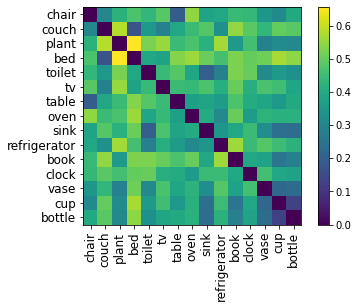

In [26]:
import matplotlib.pyplot as plt
import numpy as np

dist_matrix = DistMatrix(coco_categories, mode='bert').dist_matrix
num_class = len(coco_categories)
plt.imshow(dist_matrix, interpolation='none')
plt.colorbar()
plt.xticks(range(num_class), [coco_label_mapping[label] for label in range(num_class)], fontsize=12, rotation=90)
plt.yticks(range(num_class), [coco_label_mapping[label] for label in range(num_class)], fontsize=12)

([<matplotlib.axis.XTick at 0x7efcc1e97910>,
 [Text(0, 0, 'chair'),
  Text(1, 0, 'couch'),
  Text(2, 0, 'plant'),
  Text(3, 0, 'bed'),
  Text(4, 0, 'toilet'),
  Text(5, 0, 'tv'),
  Text(6, 0, 'table'),
  Text(7, 0, 'oven'),
  Text(8, 0, 'sink'),
  Text(9, 0, 'refrigerator'),
  Text(10, 0, 'book'),
  Text(11, 0, 'clock'),
  Text(12, 0, 'vase'),
  Text(13, 0, 'cup'),
  Text(14, 0, 'bottle')])

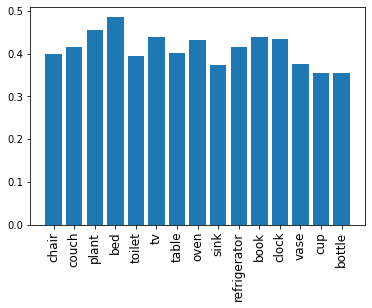

In [27]:
plt.bar(range(num_class), np.nanmean(dist_matrix, axis=1, where=(dist_matrix!=0.0)))
plt.xticks(range(num_class), [coco_label_mapping[label] for label in range(num_class)], fontsize=12, rotation=90)

([<matplotlib.axis.YTick at 0x7efcc1d8cc40>,
 [Text(0, 0, 'chair'),
  Text(0, 1, 'couch'),
  Text(0, 2, 'plant'),
  Text(0, 3, 'bed'),
  Text(0, 4, 'toilet'),
  Text(0, 5, 'tv'),
  Text(0, 6, 'table'),
  Text(0, 7, 'oven'),
  Text(0, 8, 'sink'),
  Text(0, 9, 'refrigerator'),
  Text(0, 10, 'book'),
  Text(0, 11, 'clock'),
  Text(0, 12, 'vase'),
  Text(0, 13, 'cup'),
  Text(0, 14, 'bottle')])

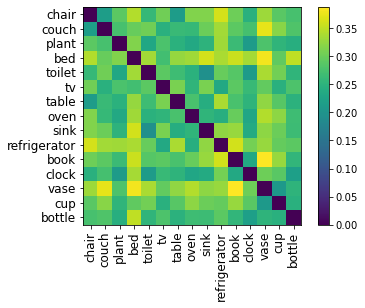

In [28]:
import matplotlib.pyplot as plt
import numpy as np

dist_matrix = DistMatrix(coco_categories, mode='clip').dist_matrix
num_class = len(coco_categories)
plt.imshow(dist_matrix, interpolation='none')
plt.colorbar()
plt.xticks(range(num_class), [coco_label_mapping[label] for label in range(num_class)], fontsize=12, rotation=90)
plt.yticks(range(num_class), [coco_label_mapping[label] for label in range(num_class)], fontsize=12)

([<matplotlib.axis.XTick at 0x7efcc1d20460>,
 [Text(0, 0, 'chair'),
  Text(1, 0, 'couch'),
  Text(2, 0, 'plant'),
  Text(3, 0, 'bed'),
  Text(4, 0, 'toilet'),
  Text(5, 0, 'tv'),
  Text(6, 0, 'table'),
  Text(7, 0, 'oven'),
  Text(8, 0, 'sink'),
  Text(9, 0, 'refrigerator'),
  Text(10, 0, 'book'),
  Text(11, 0, 'clock'),
  Text(12, 0, 'vase'),
  Text(13, 0, 'cup'),
  Text(14, 0, 'bottle')])

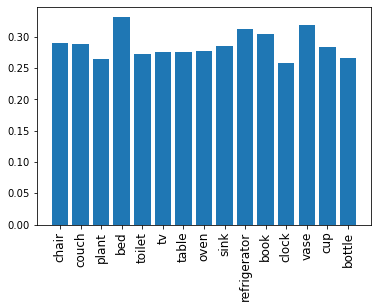

In [29]:
plt.bar(range(num_class), np.nanmean(dist_matrix, axis=1, where=(dist_matrix!=0.0)))
plt.xticks(range(num_class), [coco_label_mapping[label] for label in range(num_class)], fontsize=12, rotation=90)